# Assignment 7: MRI Connectivity Analysis
## Computational Methods in Psychology and Neuroscience
### Psychology 4215/7215 --- Fall 2023

# Objectives

Upon completion of this assignment, the student will have:

A. Loaded MRI connectivity data for rest and BART (the balloon analog risk task)

B. Compared functional connectivity between the two tasks


# Assignment

* Write code in a Jupyter notebook (after making a copy and renaming it to have your userid in the title --- e.g., A07_MRI_Connectivity_Analysis_mst3k).

## Details

The goal of this assignment is to visualize differences in functional connectivity between rest and a task (in this case the task is the Balloon Analog Risk Task, or BART). 

I have preprocessed the data into separate time series for regions defined by the Harvard--Oxford database and provided them as a download from Canvas (the filename is `Rest_BART_time_series.npz`, which is a compressed numpy file.) You can see the code I used to preprocess the data in the first handful of cells.

Your assignment is to:

- Read in the time series data (code is provided for that)
- Calculate correlation matrices for the rest and BART time series
- Plot the correlation matrices
- Plot the connectivity graphs for Rest, BART, and Rest-BART
- Discuss what you found
  
* ***When you are done with the analysis, save this notebook as HTML (`File -> Download as -> HTML`) and upload it to the matching assignment on Canvas.***  

In [1]:
# Load some required modules

# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import pandas as pd               # efficient tables
import matplotlib.pyplot as plt   # plotting
from scipy import stats
import os

# import nilearn stuff
from nilearn import plotting, image
from nilearn.maskers import NiftiLabelsMasker
from nilearn import datasets
from nilearn.connectome import ConnectivityMeasure


In [2]:
# load the Harvard Oxford atlas
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm',
                                             symmetric_split=True)
atlas_filename = atlas.maps
labels = atlas.labels

In [11]:
# extract the coordinates of the atlas regions
coords = plotting.find_parcellation_cut_coords(
    labels_img=atlas_filename)

In [3]:
# Here's what I ran to load the resting data timeseries
"""
masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

# define the functional data
epi_file = 's042m.rest.np.preproc.nii.gz'

# calculate the average time_series for each region
time_series_rest = masker.fit_transform(epi_file)
"""

[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('s042m.rest.np.preproc.nii.gz', <nilearn.maskers.nifti_labels_masker._ExtractionFunctor object at 0x7f7e0c6d1660>, 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_labels': True,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7f7e1003b220>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': 'zscore_sample',
  'strategy': 'mean',
  't_r': None,

In [19]:
# Here's what I ran to load the BART data timeseries
"""
masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    standardize="zscore_sample",
    standardize_confounds="zscore_sample",
    memory="nilearn_cache",
    verbose=5,
)

# define the functional data
epi_file = 's042m.BART.np.preproc.nii.gz'

# calculate the average time_series for each region
time_series_bart = masker.fit_transform(epi_file)
"""

[NiftiLabelsMasker.wrapped] loading data from Nifti1Image(
shape=(91, 109, 91),
affine=array([[   2.,    0.,    0.,  -90.],
       [   0.,    2.,    0., -126.],
       [   0.,    0.,    2.,  -72.],
       [   0.,    0.,    0.,    1.]])
)
Resampling labels
________________________________________________________________________________
[Memory] Calling nilearn.maskers.base_masker._filter_and_extract...
_filter_and_extract('s042m.BART.np.preproc.nii.gz', <nilearn.maskers.nifti_labels_masker._ExtractionFunctor object at 0x7f7db41e3340>, 
{ 'background_label': 0,
  'clean_kwargs': {},
  'detrend': False,
  'dtype': None,
  'high_pass': None,
  'high_variance_confounds': False,
  'keep_masked_labels': True,
  'labels': None,
  'labels_img': <nibabel.nifti1.Nifti1Image object at 0x7f7e1003b220>,
  'low_pass': None,
  'mask_img': None,
  'reports': True,
  'smoothing_fwhm': None,
  'standardize': 'zscore_sample',
  'standardize_confounds': 'zscore_sample',
  'strategy': 'mean',
  't_r': None,

In [34]:
# Here's how I saved it out
"""
np.savez_compressed('Rest_BART_time_series.npz', 
                    rest=time_series_rest,
                    bart=time_series_bart)
"""

In [35]:
# And here's how you read it in
ts = np.load('Rest_BART_time_series.npz')
time_series_rest = ts['rest']
time_series_bart = ts['bart']

In [38]:
print('Rest:', time_series_rest.shape)
print('BART:', time_series_bart.shape)
nsamps = min(len(time_series_rest), len(time_series_bart))
print(nsamps)

# looks like we need to cut off the tail end of the rest,
# so that our correlations are comparable
time_series_rest = time_series_rest[:nsamps, :]

Rest: (594, 96)
BART: (352, 96)
352


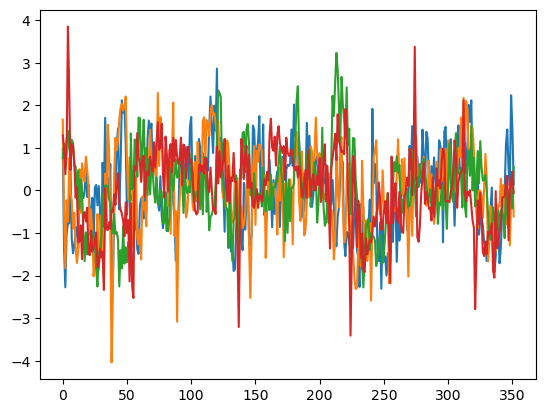

In [39]:
# let's plot a couple to see what they are like
plt.plot(time_series_bart[:,2]);
plt.plot(time_series_bart[:,15]);
plt.plot(time_series_rest[:,2]);
plt.plot(time_series_rest[:,15]);

## Calculate the Correlations

You now should calculate the correlations for the two time series datasets making use of `ConnectivityMeasure` and plot each one with `plot_matrix`.

Don't forget to zero out the diagonal with `fill_diagonal`.

In [47]:
# Calculate the Connectivity for Rest

# zero out the main diagonal

# plot the correlation matrix



In [46]:
# Calculate the Connectivity for BART

# zero out the main diagonal

# plot the correlation matrix


## Connectome plots

Now that we have the pairwise correlations, we can plot the connectivity with the `plot_connectome` method. 

You'll want to apply an `edge_threshold="99%"` to make it so only the most connected areas are included.

In [43]:
# Connectome plot of Rest


In [44]:
# Connectome plot of BART


In [45]:
# Connectome plot of BART - Rest


## Discussion

- Please write two or three bullet points describing what you found.
- What regions were most connected at rest? What about during the BART?
- What regions were most different between rest and BART?